<a href="https://colab.research.google.com/github/fowardelcac/Abandono-Escolar/blob/main/Notebooks/conclusiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/fowardelcac/Abandono-Escolar.git

Cloning into 'Abandono-Escolar'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 55 (delta 8), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (55/55), 602.80 KiB | 6.62 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sector = pd.read_csv('/content/Abandono-Escolar/Dataset/datasets2/Data_with_sector.csv').drop('Unnamed: 0', axis = 1)
df = pd.read_csv('/content/Abandono-Escolar/Dataset/datasets2/df.csv').drop('Unnamed: 0', axis = 1)
internat = pd.read_csv('/content/Abandono-Escolar/Dataset/dataset.csv')['International'].to_frame()

In [4]:
df.head()

,Marital status,attendance,Esn,Debtor,fees,Gender,scholarship,Target,Sector_Agronomy and Veterinary Science,Sector_Business and Communication,...,Age at enrollment,Unemployment rate,Inflation rate,GDP,Enrolled1,Approved1,Enrolled2,Approved2,Tasa_1st,Tasa_2nd
0,0,1,0,0,1,1,0,0,0,0,...,20,10.8,1.4,1.74,0,0,0,0,0.000000,0.000000
1,0,1,0,0,0,1,0,1,0,0,...,19,13.9,-0.3,0.79,6,6,6,6,100.000000,100.000000
2,0,1,0,0,0,1,0,0,0,0,...,19,10.8,1.4,1.74,6,0,6,0,0.000000,0.000000
3,0,1,0,0,1,0,0,1,0,1,...,20,9.4,-0.8,-3.12,6,6,6,5,100.000000,83.333333
4,1,0,0,0,1,0,0,1,0,0,...,45,13.9,-0.3,0.79,6,5,6,6,83.333333,100.000000


# ¿Como esta distribuida la edad de los estudiantes?

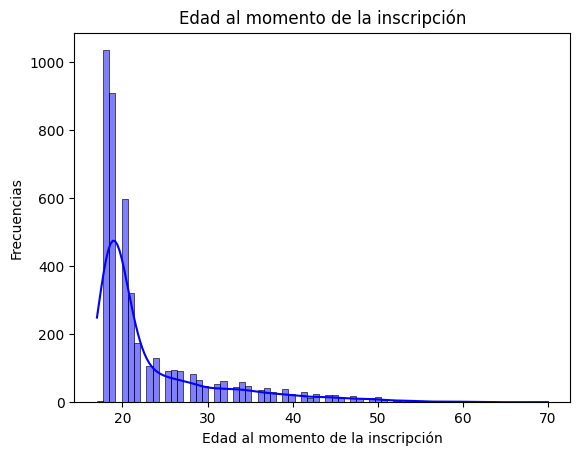

In [5]:
sns.histplot(df['Age at enrollment'], kde=True, color='blue')  # kde=True agrega una estimación de la densidad del kernel.
plt.xlabel('Edad al momento de la inscripción')
plt.ylabel('Frecuencias')
plt.title('Edad al momento de la inscripción')
plt.show()

In [6]:
df['Age at enrollment'].describe()

count    4424.000000
mean       23.265145
std         7.587816
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        70.000000
Name: Age at enrollment, dtype: float64

Apartir del grafico y algunos estadisticos, podemos ver que el 75% de los estudiantes se inscriben para comenzar sus estudios universitarios entre los 17 y 25 años.

# Genero
### ¿Cuantos hombres y mujeres cursan carreras universitarias? ¿Las mujeres terminan su cursado mas que los hombres?

In [35]:
def frecuencia_relativa(muestra, subconjunto):
  N = len(muestra)
  return ((len(subconjunto) / N) * 100)

In [36]:
print(f'Proporccion de hombres con respecto a la muestra: {frecuencia_relativa(df, df[df.Gender == 1]):.2f}%')
print(f'Proporccion de mujeres con respecto a la muestra: {frecuencia_relativa(df, df[df.Gender == 0]):.2f}%')

Proporccion de hombres con respecto a la muestra: 35.17%
Proporccion de mujeres con respecto a la muestra: 64.83%


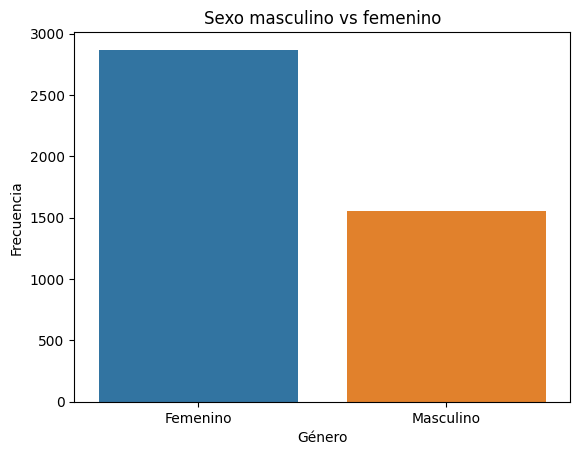

In [26]:
# Genera el gráfico de barras horizontal con Seaborn
sns.countplot(x='Gender', data=df)

# Puedes personalizar aún más el gráfico, como títulos y etiquetas
plt.ylabel("Frecuencia")
plt.xlabel("Género")
plt.title("Sexo masculino vs femenino")
plt.xticks(ticks=[0,1], labels=['Femenino','Masculino'])

# Muestra el gráfico
plt.show()

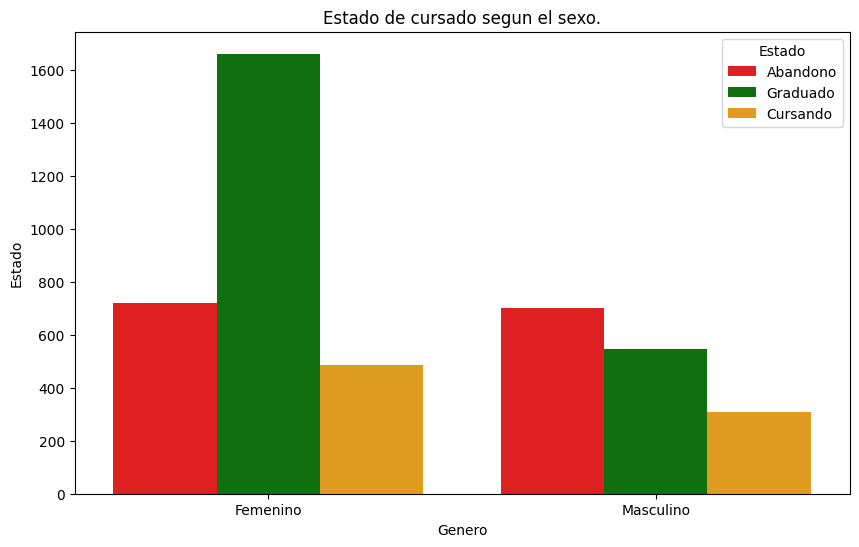

In [27]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.countplot(data = df, x ='Gender', hue = 'Target', palette = {0: "red", 1: "green", 2: 'orange'})
# Personalizar el gráfico
plt.title("Estado de cursado segun el sexo.")
plt.xlabel("Genero")
plt.ylabel("Estado")
plt.legend(title = "Estado", labels=["Abandono", "Graduado", "Cursando"])
plt.xticks(ticks=[0,1], labels=['Femenino','Masculino'])
# Mostrar el gráfico
plt.show()

In [37]:
df_graduate = df[df.Target == 1]
h = frecuencia_relativa(df_graduate, df_graduate[df_graduate.Gender == 1])
m = frecuencia_relativa(df_graduate, df_graduate[df_graduate.Gender == 0])
print(f'Cada 100 estudiantes graduados hay: {h:.2f} hombres y {m:.2f} mujeres')

Cada 100 estudiantes graduados hay: 24.81 hombres y 75.19 mujeres


## Claramente podemos ver que Las mujeres se graduan tres veces mas que los hombres, pero a su vez dentro de la muestra existe casi el doble(1.8 veces mas) de mujeres que hombres, podriamos asumir que existe algun tipo de sesgo no intencional en la muestra cometido durante el censado

### ¿el sexo tiene alguna influencia en la decision de la carrera?

In [64]:
dic = (sector.Sector.value_counts()).to_dict()

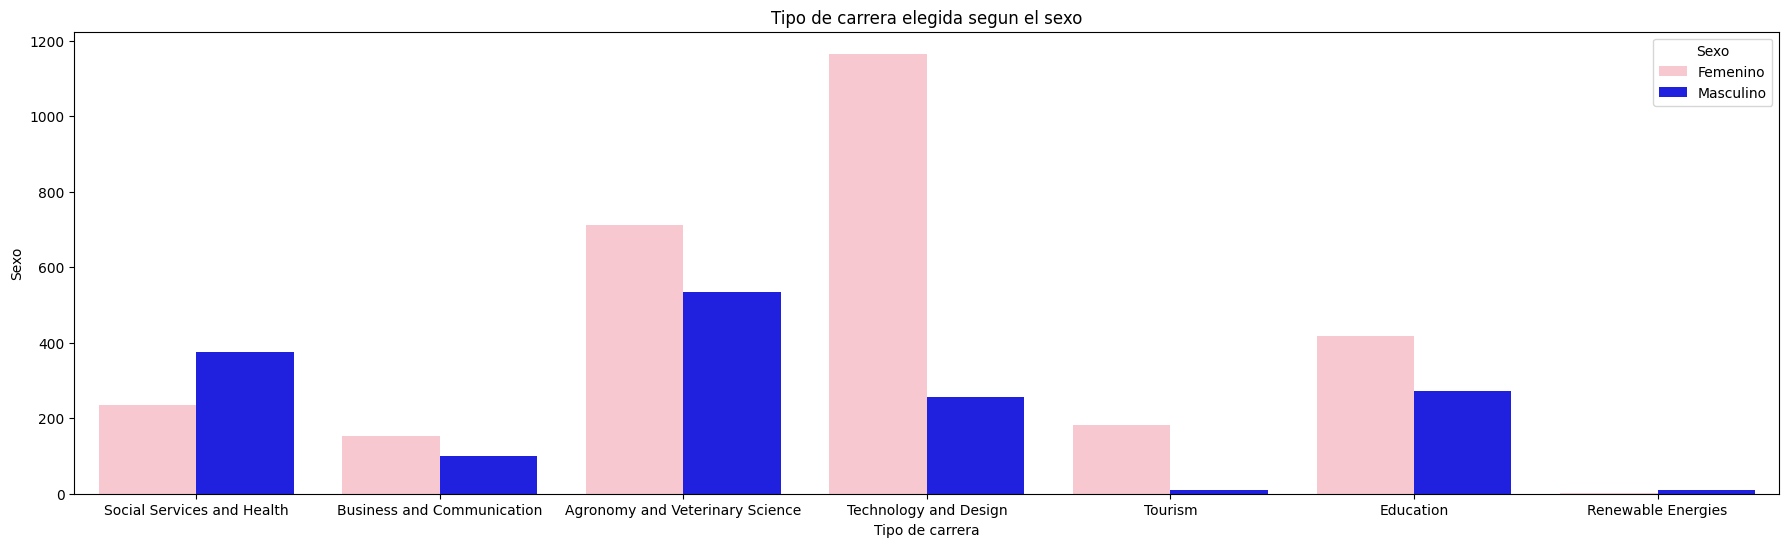

In [62]:
plt.figure(figsize=(22, 6))  # Tamaño de la figura
sns.countplot(data = sector, x ='Sector', hue = 'Gender', palette = {0: "pink", 1: "blue"})
# Personalizar el gráfico
plt.title("Tipo de carrera elegida segun el sexo")
plt.xlabel("Tipo de carrera")
plt.ylabel("Sexo")
plt.legend(title = "Sexo", labels=['Femenino','Masculino'])
plt.xticks(ticks=range(len(dic)), labels=dic.keys())
# Mostrar el gráfico
plt.show()

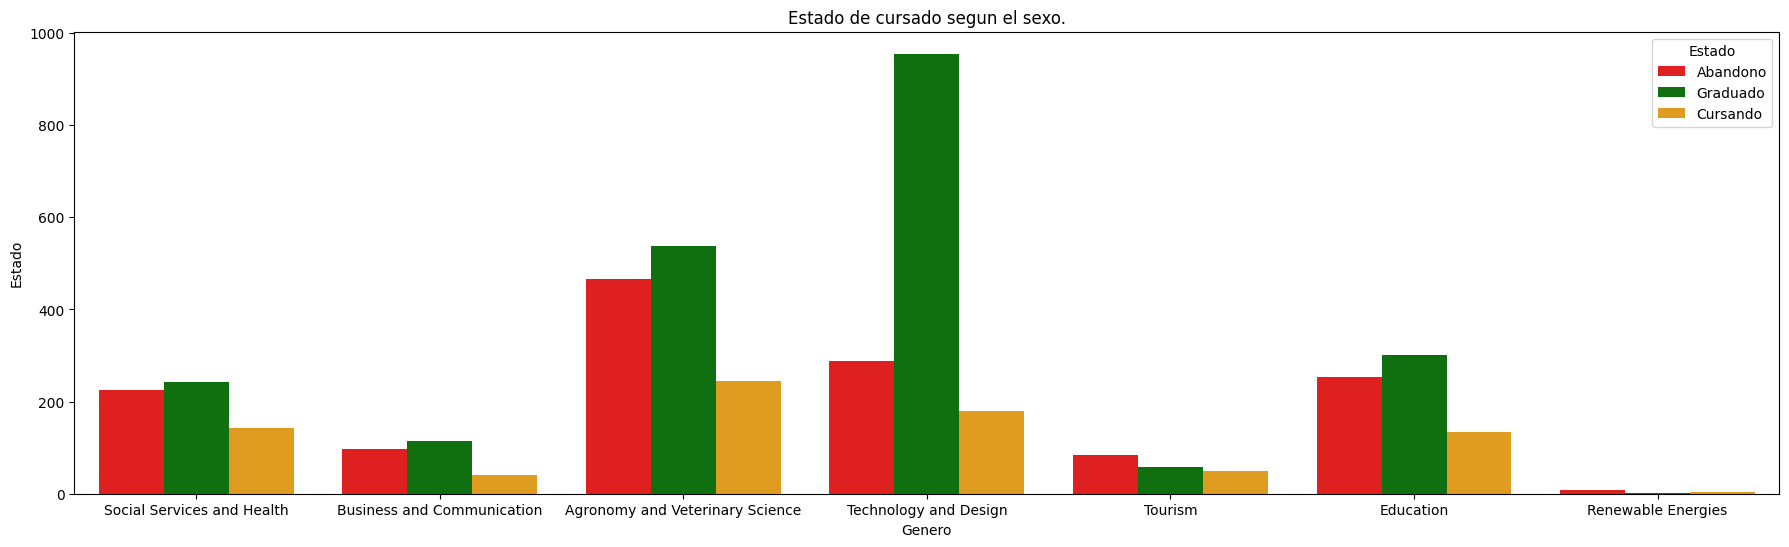

In [65]:
plt.figure(figsize=(22, 6))  # Tamaño de la figura
sns.countplot(data = sector, x ='Sector', hue = 'Target',  palette = {0: "red", 1: "green", 2: 'orange'})
# Personalizar el gráfico
plt.title("Estado de cursado segun el sexo.")
plt.xlabel("Tipo de carrera")
plt.ylabel("Estado")
plt.legend(title = "Estado", labels=["Abandono", "Graduado", "Cursando"])
plt.xticks(ticks=range(len(dic)), labels=dic.keys())
# Mostrar el gráfico
plt.show()

## Se puede apreciar que los dos sectores 'Tecnologia y diseño' y 'Agronomia y ciencias veterinarias' son las carreras con mas graduados, y si observamios en el primer grafico vemos que ambas carreras cuentran con un mayor cursado de mujeres, podriamos suponer que esto podria generar una influencia en el porque las mujeres se graduan tres veces mas que los hombres